# . Cybersecurity Events 
        Source: Kaggle or Google Dataset Search
        Description: Contains information about cybersecurity breaches, including attack types, attack vectors, affected     industries, and response times.
        Use Cases:Predict the likelihood of future breaches,classify attack types,analyze trends in cybersecurity incidents.
        Link: Search for “Cybersecurity Breach Dataset” on Kaggle or use this sample: Cybersecurity Breaches Dataset

## Steps to Work with the Dataset
    Perform EDA:
    Visualization Ideas:
    Visualization Ideas:
    Modeling: Regression , classification and Clustering

    

### Modeling Use Cases:

    Classification: Predict if a breach is IsSensitive or IsMalware based on other fields.
   
    
    Clustering: Group breaches based on similarity in features like PwnCount, IsSpamList, and IsSensitive.

# 1. perform EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df=pd.read_csv("C:/Users/wasid/Downloads/cyber_breached.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree
0,0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26T23:35:45Z,2017-12-10T21:44:27Z,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False
1,1,123RF,123RF,123rf.com,2020-03-22,2020-11-15T00:59:50Z,2020-11-15T01:07:10Z,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False
2,2,126,126,126.com,2012-01-01,2016-10-08T07:46:05Z,2016-10-08T07:46:05Z,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,False
3,3,17Media,17,17app.co,2016-04-19,2016-07-08T01:55:03Z,2016-07-08T01:55:03Z,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False,False
4,4,17173,17173,17173.com,2011-12-28,2018-04-28T04:53:15Z,2018-04-28T04:53:15Z,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False,False


In [4]:
df.shape

(777, 18)

In [5]:
df=df.rename(columns={"Unnamed: 0":"Index"})

In [6]:
# Stats
df.describe()


,Index,PwnCount
count,777.000000,7.770000e+02
mean,388.000000,1.739676e+07
std,224.444871,7.006886e+07
min,0.000000,8.580000e+02
25%,194.000000,2.695520e+05
50%,388.000000,1.141278e+06
75%,582.000000,5.970416e+06
max,776.000000,7.729050e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               777 non-null    int64 
 1   Name                777 non-null    object
 2   Title               777 non-null    object
 3   Domain              739 non-null    object
 4   BreachDate          777 non-null    object
 5   AddedDate           777 non-null    object
 6   ModifiedDate        777 non-null    object
 7   PwnCount            777 non-null    int64 
 8   Description         777 non-null    object
 9   LogoPath            777 non-null    object
 10  DataClasses         777 non-null    object
 11  IsVerified          777 non-null    bool  
 12  IsFabricated        777 non-null    bool  
 13  IsSensitive         777 non-null    bool  
 14  IsRetired           777 non-null    bool  
 15  IsSpamList          777 non-null    bool  
 16  IsMalware           777 no

In [8]:
# checking null values
df.isnull().sum()

Index                  0
Name                   0
Title                  0
Domain                38
BreachDate             0
AddedDate              0
ModifiedDate           0
PwnCount               0
Description            0
LogoPath               0
DataClasses            0
IsVerified             0
IsFabricated           0
IsSensitive            0
IsRetired              0
IsSpamList             0
IsMalware              0
IsSubscriptionFree     0
dtype: int64

In [9]:
df['Domain'].unique

<bound method Series.unique of 0      000webhost.com
1           123rf.com
2             126.com
3            17app.co
4           17173.com
            ...      
772      zurich.co.jp
773         zynga.com
774    parapa.mail.ru
775     sprashivai.ru
776      ggumim.co.kr
Name: Domain, Length: 777, dtype: object>

In [10]:
df['Domain']=df['Domain'].fillna('No domain')

In [11]:
df.info()
# null values removed succwssfuly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               777 non-null    int64 
 1   Name                777 non-null    object
 2   Title               777 non-null    object
 3   Domain              777 non-null    object
 4   BreachDate          777 non-null    object
 5   AddedDate           777 non-null    object
 6   ModifiedDate        777 non-null    object
 7   PwnCount            777 non-null    int64 
 8   Description         777 non-null    object
 9   LogoPath            777 non-null    object
 10  DataClasses         777 non-null    object
 11  IsVerified          777 non-null    bool  
 12  IsFabricated        777 non-null    bool  
 13  IsSensitive         777 non-null    bool  
 14  IsRetired           777 non-null    bool  
 15  IsSpamList          777 non-null    bool  
 16  IsMalware           777 no

In [12]:
# checking duplicates values

df.duplicated().sum()

0

Changing datatype of dates

In [13]:
df['BreachDate']=pd.to_datetime(df['BreachDate'])
df['AddedDate']=pd.to_datetime(df['AddedDate'])
df['ModifiedDate']=pd.to_datetime(df['ModifiedDate'])

In [14]:
# successfully changed to timeframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Index               777 non-null    int64              
 1   Name                777 non-null    object             
 2   Title               777 non-null    object             
 3   Domain              777 non-null    object             
 4   BreachDate          777 non-null    datetime64[ns]     
 5   AddedDate           777 non-null    datetime64[ns, UTC]
 6   ModifiedDate        777 non-null    datetime64[ns, UTC]
 7   PwnCount            777 non-null    int64              
 8   Description         777 non-null    object             
 9   LogoPath            777 non-null    object             
 10  DataClasses         777 non-null    object             
 11  IsVerified          777 non-null    bool               
 12  IsFabricated        777 non-null    

In [15]:
# unique values
df['PwnCount'].unique()

array([ 14936670,   8661578,   6414191,   4009640,   7485802,  80115532,
           17706,  14867999,   9121434,  15025407,  17979961,    776125,
          919790,   1372550,    432943,     16006,   1583193,  14055729,
         9363740,   4284538,   5470063, 152445165,   3867997, 169746810,
          186082,     66308,     90478,    180468,  20580060,    305470,
         6496778,    266399,    917461,    108940,    297806,    745355,
         6640643,   7104998,   1431378,    368507,  22437749, 457962538,
        23246481,   2451197, 125929660,     49681,   5888405,  20012235,
        10604307,   1531235,   1079970,    157692,  30811934,      5788,
        49102176,   1436486,    261463,    580177,   2743539,    143717,
           20032,    422959,   2721835,   4101101, 105059554,    846742,
       112005531,    213415,   2107000,    530270,     83610,   1100089,
           20902,   2231256,     93343,      3204,   1274340,  24500011,
           36789,   1287073,      3402,   4789599, 

In [16]:
# looking for outliers in PwnCount 

df.describe()

,Index,BreachDate,PwnCount
count,777.000000,777,7.770000e+02
mean,388.000000,2018-04-13 06:38:27.335907328,1.739676e+07
min,0.000000,2007-07-12 00:00:00,8.580000e+02
25%,194.000000,2015-12-01 00:00:00,2.695520e+05
50%,388.000000,2018-07-01 00:00:00,1.141278e+06
75%,582.000000,2020-10-14 00:00:00,5.970416e+06
max,776.000000,2024-05-30 00:00:00,7.729050e+08
std,224.444871,NaN,7.006886e+07


<Axes: ylabel='PwnCount'>

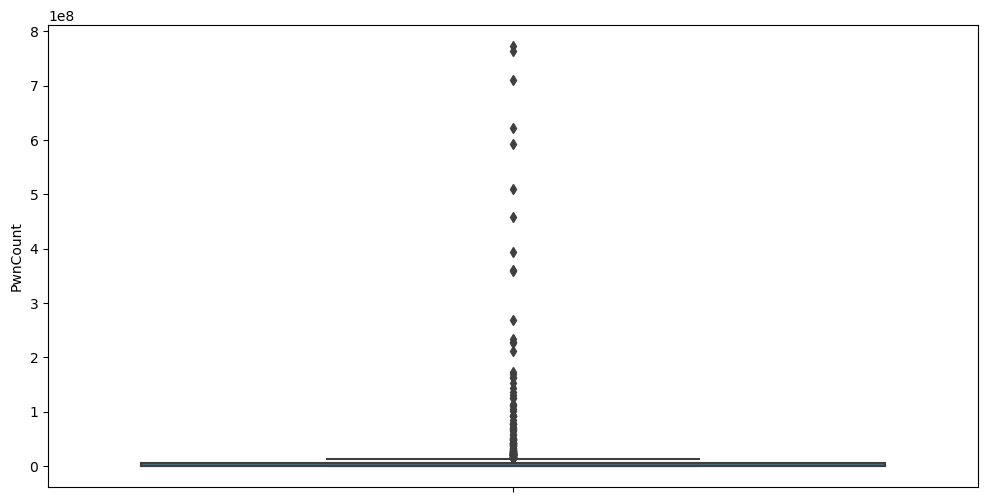

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['PwnCount']  )
# too many outliers detected

<Axes: xlabel='PwnCount', ylabel='Count'>

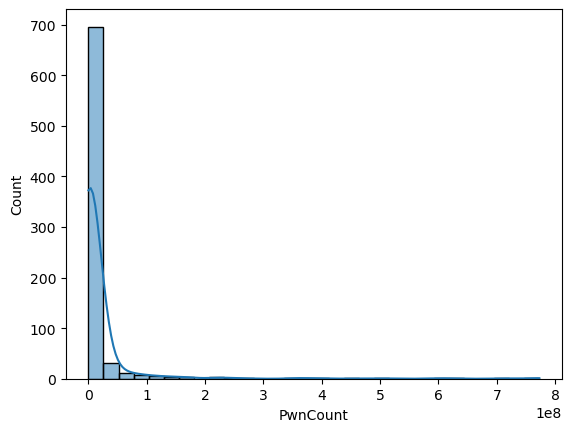

In [18]:
# whether datapoints are in normal distribution using histplot ?

sns.histplot(df['PwnCount'] , kde=True , bins=30)
# No it is not normally distributed 

    We will use IQR for removing outliers because it is not normally distibuted ,
    However our data is skewed from right side, need to log transform data before applying IQR .

# Apply Log Transformation

Log transformation will reduce skewness and make the distribution more normal-like. It is used to remove skewness in the data

    Why Use np.log1p Instead of np.log?
    np.log1p(x) computes log(1 + x) instead of just log(x).
    This avoids issues when x = 0, because log(0) is undefined, but log(1 + 0) = 0 is valid.
    It's useful when data contains zeros and very small values.

In [19]:
df['PwnCount_log']=np.log1p(df['PwnCount'])  # avoids log(0) issues
df['PwnCount_log']

0      16.519330
1      15.974408
2      15.674024
3      15.204212
4      15.828519
         ...    
772    13.536772
773    18.968048
774    15.414262
775    15.061037
776    14.076837
Name: PwnCount_log, Length: 777, dtype: float64

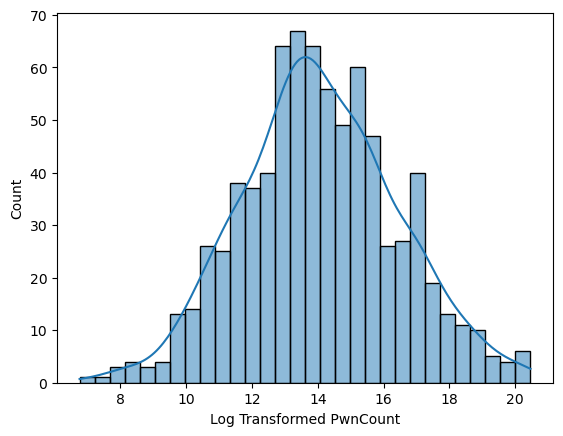

In [20]:
# Plot transformed data
sns.histplot(df['PwnCount_log'], kde=True, bins=30)
plt.xlabel("Log Transformed PwnCount")
plt.ylabel("Count")
plt.show()

In [21]:
# comparing both columns

df[['PwnCount','PwnCount_log']]

,PwnCount,PwnCount_log
0,14936670,16.519330
1,8661578,15.974408
2,6414191,15.674024
3,4009640,15.204212
4,7485802,15.828519
...,...,...
772,756737,13.536772
773,172869660,18.968048
774,4946850,15.414262
775,3474763,15.061037


In [22]:
Q1 =df['PwnCount_log'].quantile(.25)  #25%
Q3 =df['PwnCount_log'].quantile(.75)   #75%

IQR=Q3-Q1

# Lower bound
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [23]:
# detected outliers
outliers = df[(df['PwnCount_log']<lower_bound) | (df['PwnCount_log']>upper_bound)]
outliers

,Index,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,PwnCount_log
141,141,Collection1,Collection #1,No domain,2019-01-07,2019-01-16 21:46:07+00:00,2019-01-16 21:50:21+00:00,772904991,"In January 2019, a large collection of credent...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,False,20.465667
176,176,devkitPro,devkitPro,devkitpro.org,2019-02-03,2019-02-11 07:21:44+00:00,2019-02-11 07:21:44+00:00,1508,"In February 2019, <a href=""https://devkitpro.o...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Private mess...",True,False,False,False,False,False,False,7.319202
490,490,OnlinerSpambot,Onliner Spambot,No domain,2017-08-28,2017-08-29 19:25:56+00:00,2017-08-29 19:25:56+00:00,711477622,"In August 2017, a spambot by the name of <a hr...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",True,False,False,False,True,False,False,20.382855
657,657,Tesco,Tesco,tesco.com,2014-02-12,2014-02-13 21:19:24+00:00,2014-02-13 21:19:24+00:00,2239,"In February 2014, <a href=""http://www.bbc.co.u...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Reward progr...",True,False,False,False,False,False,False,7.714231
708,708,VerificationsIO,Verifications.io,verifications.io,2019-02-25,2019-03-09 19:29:54+00:00,2019-03-09 20:49:51+00:00,763117241,"In February 2019, the email address validation...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Employe...",True,False,False,False,False,False,False,20.452922
745,745,WPSandbox,WPSandbox,wpsandbox.io,2018-11-04,2018-11-06 07:26:07+00:00,2018-11-06 07:26:07+00:00,858,"In November 2018, the WordPress sandboxing ser...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",True,False,False,False,False,False,False,6.755769


In [24]:
# cleaned data from outliers

df2 = df[~((df['PwnCount_log']<lower_bound) | (df['PwnCount_log']>upper_bound))]
df2

,Index,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,PwnCount_log
0,0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45+00:00,2017-12-10 21:44:27+00:00,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False,16.519330
1,1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50+00:00,2020-11-15 01:07:10+00:00,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False,15.974408
2,2,126,126,126.com,2012-01-01,2016-10-08 07:46:05+00:00,2016-10-08 07:46:05+00:00,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,False,15.674024
3,3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03+00:00,2016-07-08 01:55:03+00:00,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False,False,15.204212
4,4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15+00:00,2018-04-28 04:53:15+00:00,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False,False,15.828519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,Zurich,Zurich,zurich.co.jp,2023-01-08,2023-01-22 22:30:56+00:00,2023-01-22 22:30:56+00:00,756737,"In January 2023, <a href=""https://therecord.me...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False,False,13.536772
773,773,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19 04:54:45+00:00,2020-01-11 00:41:51+00:00,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",True,False,False,False,False,False,False,18.968048
774,774,Parapa,Пара Па,parapa.mail.ru,2016-08-08,2016-12-28 07:03:17+00:00,2016-12-28 07:03:17+00:00,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False,False,15.414262
775,775,SprashivaiRu,Спрашивай.ру,sprashivai.ru,2015-05-11,2015-05-12 23:50:08+00:00,2015-05-12 23:50:08+00:00,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False,False,15.061037


In [25]:
print(129+648)

777


<Axes: ylabel='PwnCount_log'>

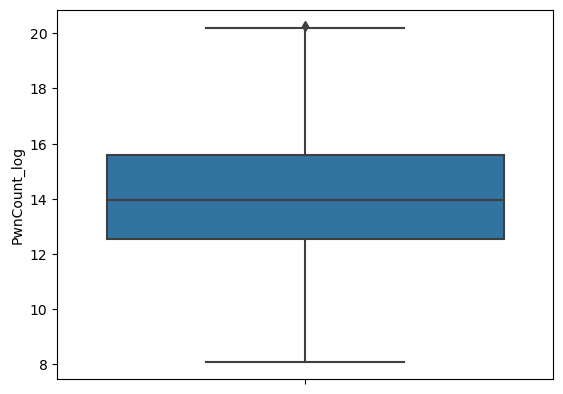

In [26]:
sns.boxplot(y=df2['PwnCount_log'])

<Axes: xlabel='PwnCount_log', ylabel='Count'>

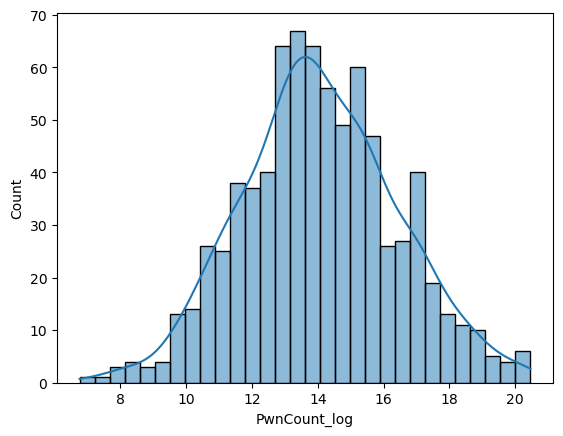

In [27]:
sns.histplot( df['PwnCount_log'] , kde=True , bins=30)

In [28]:
df3=df.copy()

### Categorical Analysis

Explore fields like IsVerified, IsSensitive, and IsSpamList to see their distribution.

In [29]:
df.columns

Index(['Index', 'Name', 'Title', 'Domain', 'BreachDate', 'AddedDate',
       'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses',
       'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList',
       'IsMalware', 'IsSubscriptionFree', 'PwnCount_log'],
      dtype='object')

#### IsSensitive

In [30]:
# varified or not, and how many
varify=df3.groupby('IsVerified')['Index'].sum()
varify

IsVerified
False     13104
True     288372
Name: Index, dtype: int64

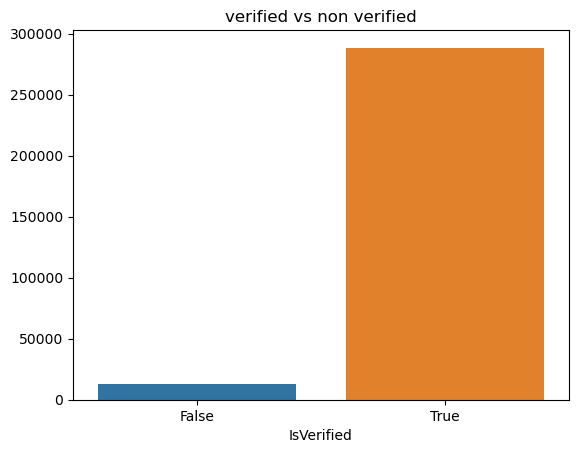

In [31]:
# visualy with barplot
sns.barplot(x=varify.index , y=varify.values)
plt.title("verified vs non verified")
plt.show()

#### Issensitive

In [32]:
# sensitive or not
sensitive=df3.groupby("IsSensitive")["Index"].sum()
sensitive

IsSensitive
False    278623
True      22853
Name: Index, dtype: int64

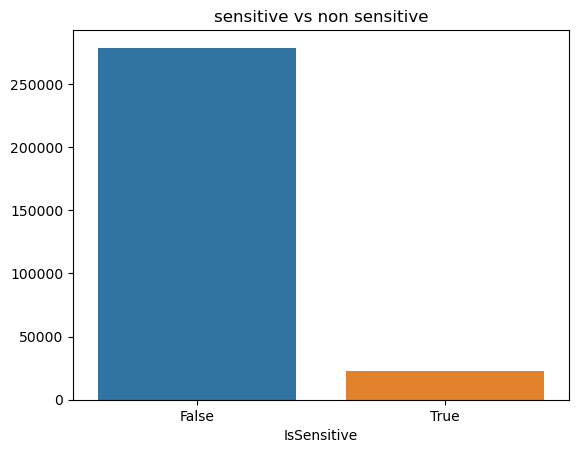

In [33]:
# visualy with barplot
sns.barplot(x=sensitive.index , y=sensitive.values)
plt.title("sensitive vs non sensitive")
plt.show()

#### IsSpam

In [34]:
# spam or not 
spam=df3.groupby("IsSpamList")["Index"].sum()
spam

IsSpamList
False    295010
True       6466
Name: Index, dtype: int64

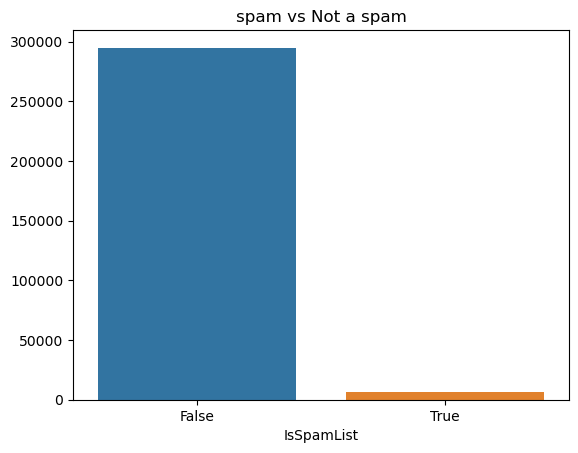

In [35]:
# visualy with barplot
sns.barplot(x=spam.index , y=spam.values)
plt.title("spam vs Not a spam")
plt.show()

#### IsMalware

In [36]:
malware= df3.groupby("IsMalware")["Index"].sum()
malware

IsMalware
False    299011
True       2465
Name: Index, dtype: int64

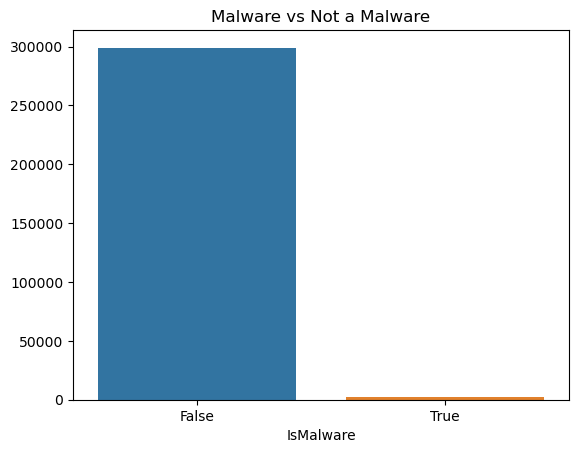

In [37]:
# visualy with barplot
sns.barplot(x=malware.index , y=malware.values)
plt.title("Malware vs Not a Malware")
plt.show()

## Time Series Analysis

Use BreachDate to understand the timeline of breaches.

In [38]:
breachdate=df3.groupby("BreachDate")['Index'].sum()

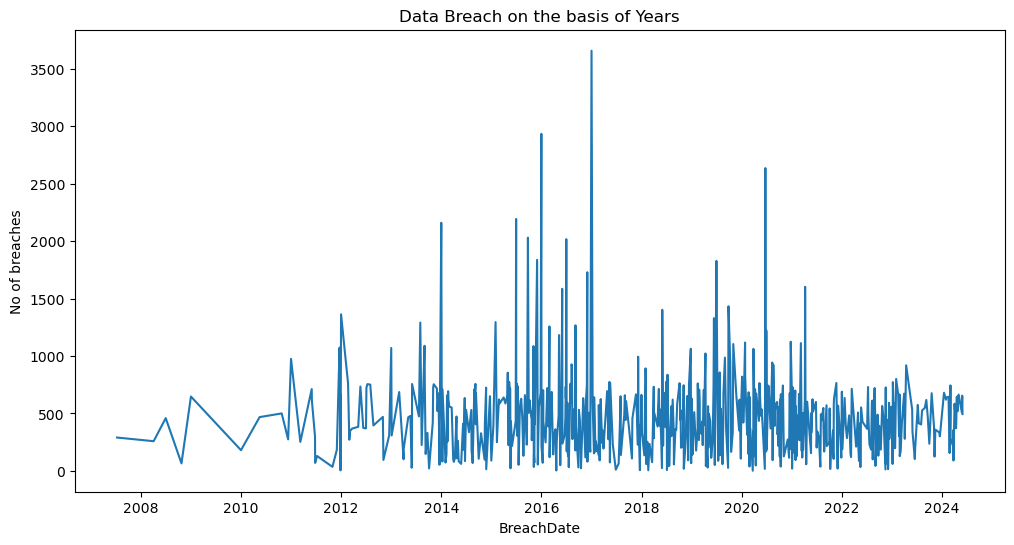

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(breachdate)
plt.title('Data Breach on the basis of Years')
plt.ylabel("No of breaches")
plt.show()

In [40]:
# Data breach on the basis of Month.
breachmonth =breachdate.resample('M').sum()

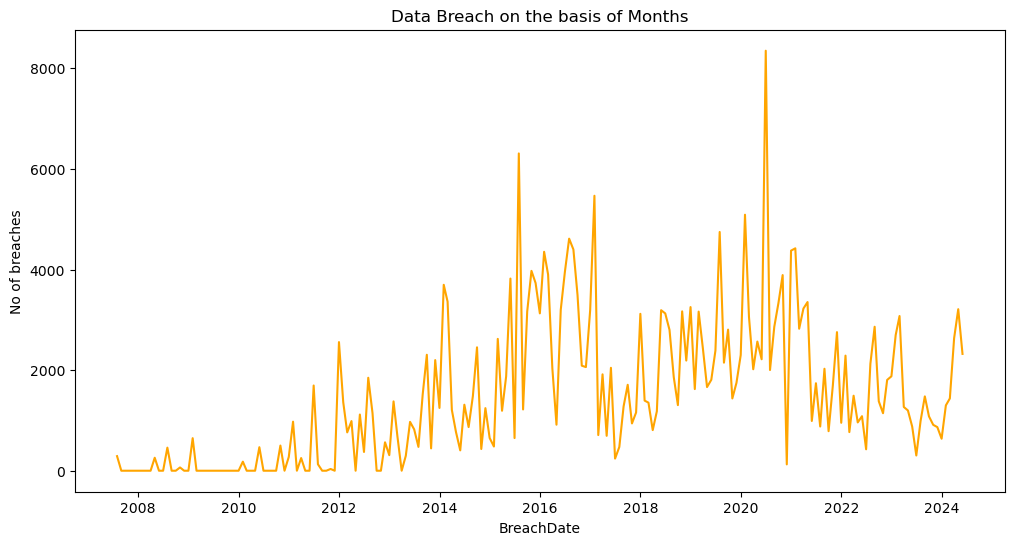

In [41]:
# Visualizing On the basis of month

plt.figure(figsize=(12,6))
sns.lineplot(breachmonth, color="orange")
plt.title('Data Breach on the basis of Months')
plt.ylabel("No of breaches")
plt.show()

In [42]:
breachweek=df3.groupby("BreachDate")["Index"].sum()

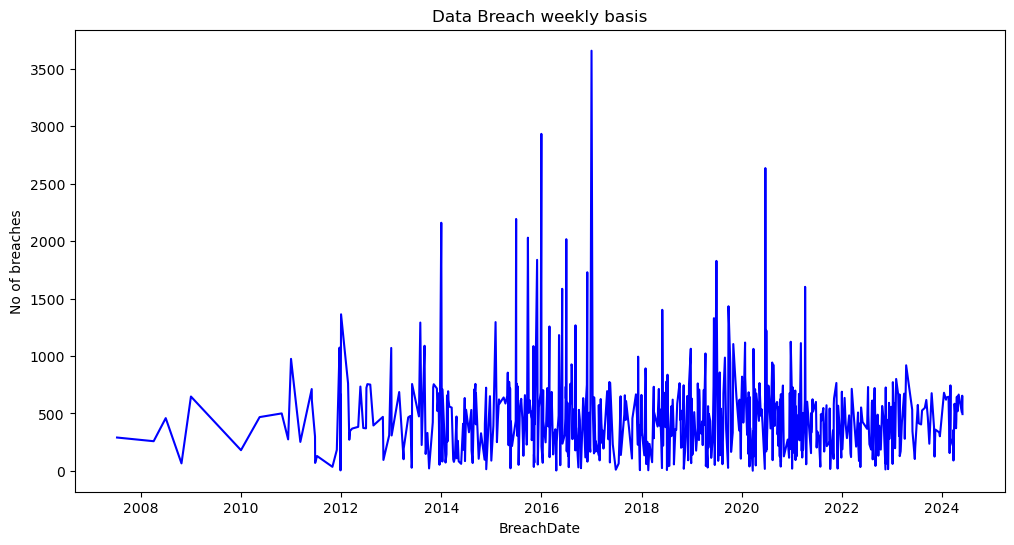

In [43]:
# Visualizing On the basis of month

plt.figure(figsize=(12,6))
sns.lineplot(breachweek , color="blue")
plt.title('Data Breach weekly basis')
plt.ylabel("No of breaches")
plt.show()

# Visualization

### Top Breached Entitie

In [44]:
df3.columns

Index(['Index', 'Name', 'Title', 'Domain', 'BreachDate', 'AddedDate',
       'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses',
       'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList',
       'IsMalware', 'IsSubscriptionFree', 'PwnCount_log'],
      dtype='object')

In [45]:
# Top 15 organizations affected by attacks

top_entity=df3.groupby("Name")['Index'].sum().sort_values(ascending=False).head(15)
top_entity

Name
DecoratingTheHouse    776
SprashivaiRu          775
Parapa                774
Zynga                 773
Zurich                772
Zooville              771
Zoosk2020             770
Zoosk                 769
Zoomcar               768
Zomato                767
Zhenai                766
ZAPHosting            765
Zacks                 764
YouveBeenScraped      763
YouPorn               762
Name: Index, dtype: int64

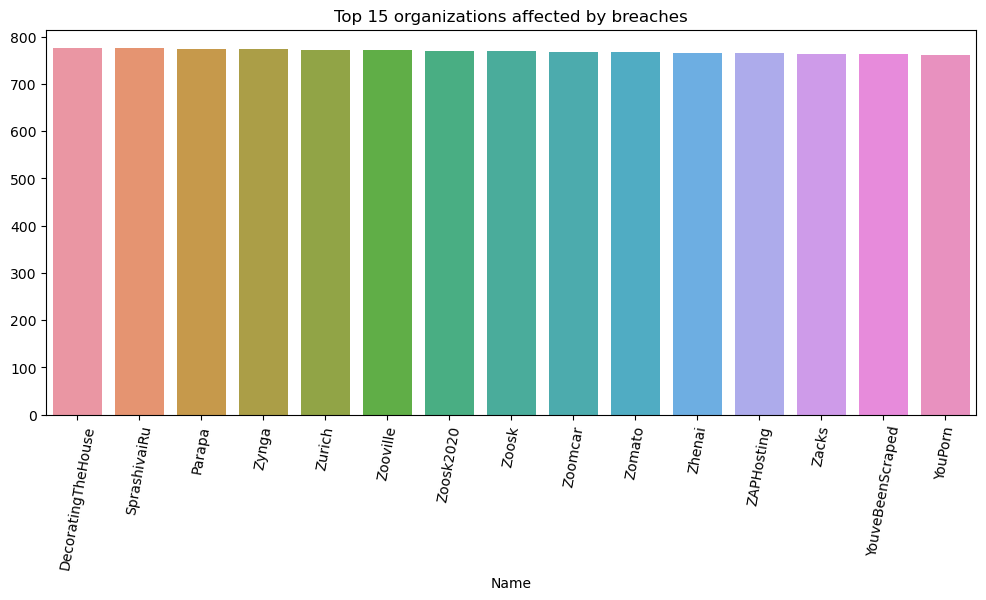

In [46]:
# visualy with barplot
plt.figure(figsize=(12,5))
sns.barplot(x=top_entity.index , y=top_entity.values)
plt.title("Top 15 organizations affected by breaches")
plt.xticks(rotation=80)
plt.show()

### Trends Over Time

In [47]:
# Affected Accounts over time

In [48]:
df3.columns

Index(['Index', 'Name', 'Title', 'Domain', 'BreachDate', 'AddedDate',
       'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses',
       'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList',
       'IsMalware', 'IsSubscriptionFree', 'PwnCount_log'],
      dtype='object')

In [49]:
aff_acc= df3.groupby("Name")["PwnCount"].sum().sort_values(ascending=False).head(10)
aff_acc

Name
Collection1           772904991
VerificationsIO       763117241
OnlinerSpambot        711477622
PDL                   622161052
ExploitIn             593427119
Facebook              509458528
AntiPublic            457962538
RiverCityMedia        393430309
TelegramCombolists    361468099
MySpace               359420698
Name: PwnCount, dtype: int64

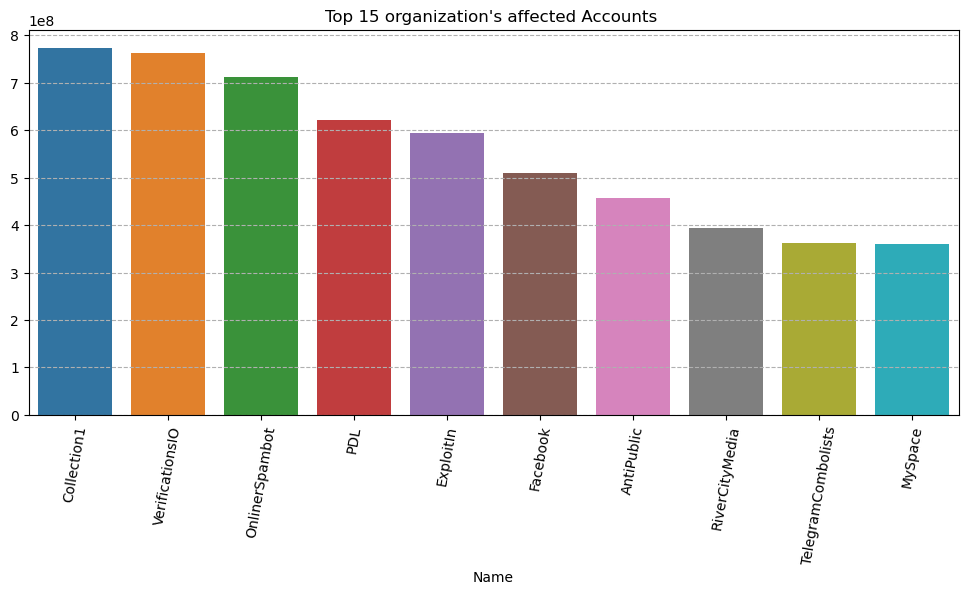

In [50]:
# visualizing Top Affected Accounts

plt.figure(figsize=(12,5))
sns.barplot(x=aff_acc.index , y=aff_acc.values)
plt.title("Top 15 organization's affected Accounts ")
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=80)
plt.show()

### Verified vs. Fabricated

In [51]:
df3.columns

Index(['Index', 'Name', 'Title', 'Domain', 'BreachDate', 'AddedDate',
       'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses',
       'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList',
       'IsMalware', 'IsSubscriptionFree', 'PwnCount_log'],
      dtype='object')

In [52]:
# For verified or not, data , from boolen values
veri_pie=df3['IsVerified'].value_counts()
veri_pie

IsVerified
True     737
False     40
Name: count, dtype: int64

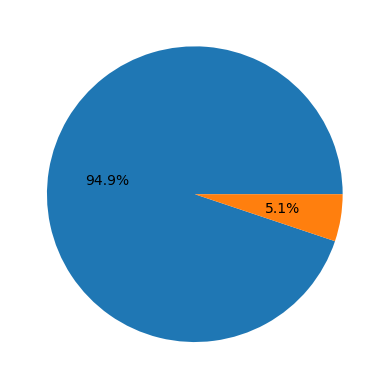

In [53]:
plt.pie(veri_pie,autopct='%1.1f%%')
plt.show()

In [54]:
#  fabricated vs non fabriocated percentage from boolen values

pi=df3['IsFabricated'].value_counts()
pi

IsFabricated
False    774
True       3
Name: count, dtype: int64

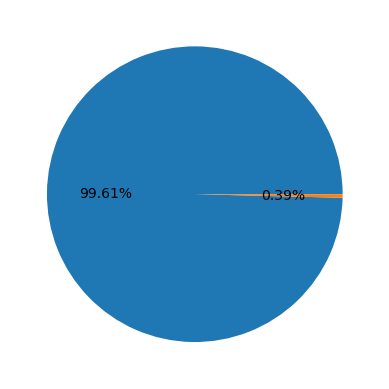

In [55]:
plt.pie(pi, autopct="%1.2f%%")
plt.show()

## Correlation Analysis

Analyze relationships between boolean flags like IsSensitive, IsSpamList, and IsMalware.

In [56]:
cor=df3[['IsSensitive','IsSpamList','IsMalware']].corr()
cor

,IsSensitive,IsSpamList,IsMalware
IsSensitive,1.000000,-0.042323,0.156036
IsSpamList,-0.042323,1.000000,0.101669
IsMalware,0.156036,0.101669,1.000000


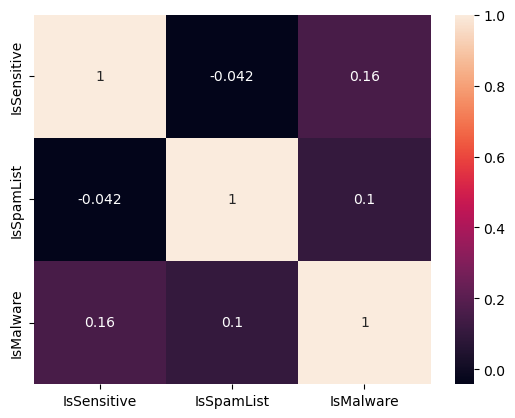

In [57]:
sns.heatmap(cor , annot=True)
plt.show()

# Feature Engineering

In [58]:
df3.head(2)

,Index,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,PwnCount_log
0,0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45+00:00,2017-12-10 21:44:27+00:00,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False,16.519330
1,1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50+00:00,2020-11-15 01:07:10+00:00,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False,15.974408


Extract insights from text fields (Description).

In [59]:
from sklearn.preprocessing import LabelEncoder # for encoding Boolen values
from sklearn.feature_extraction.text import TfidfVectorizer # text vectorozer

In [60]:
df3["Description_length"]=df3["Description"].str.len()
df3["Description_length"]

0      407
1      526
2      626
3      433
4      857
      ... 
772    547
773    473
774    439
775    546
776    692
Name: Description_length, Length: 777, dtype: int64

In [61]:
df4=df3.copy()

#### new features such as the time between BreachDate and AddedDate.

In [62]:
df3.head(3)

,Index,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,PwnCount_log,Description_length
0,0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45+00:00,2017-12-10 21:44:27+00:00,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False,16.519330,407
1,1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50+00:00,2020-11-15 01:07:10+00:00,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,False,15.974408,526
2,2,126,126,126.com,2012-01-01,2016-10-08 07:46:05+00:00,2016-10-08 07:46:05+00:00,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False,False,15.674024,626


In [63]:
# Delay time between breachDate and AddedDate


    
df3['AddedDate'] = df3['AddedDate'].dt.tz_localize(None)  # timezone support, set both to Timezone-Naive
df3['BreachDate'] = df3['BreachDate'].dt.tz_localize(None)

df4['DelayDays'] = (df3['AddedDate'] - df3['BreachDate']).dt.days


df4['DelayDays']

0       239
1       238
2      1742
3        80
4      2313
       ... 
772      14
773     109
774     142
775       1
776     128
Name: DelayDays, Length: 777, dtype: int64

In [64]:
df4.head()

,Index,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,...,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,PwnCount_log,Description_length,DelayDays
0,0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45+00:00,2017-12-10 21:44:27+00:00,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,...,True,False,False,False,False,False,False,16.519330,407,239
1,1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50+00:00,2020-11-15 01:07:10+00:00,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,...,True,False,False,False,False,False,False,15.974408,526,238
2,2,126,126,126.com,2012-01-01,2016-10-08 07:46:05+00:00,2016-10-08 07:46:05+00:00,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,...,False,False,False,False,False,False,False,15.674024,626,1742
3,3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03+00:00,2016-07-08 01:55:03+00:00,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,...,True,False,False,False,False,False,False,15.204212,433,80
4,4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15+00:00,2018-04-28 04:53:15+00:00,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,...,False,False,False,False,False,False,False,15.828519,857,2313


#### Encode boolean columns for modeling.

In [65]:
le=LabelEncoder()

In [66]:
# converting domain column in numerical column, using Label encoding
df4['Domain'] = le.fit_transform(df4['Domain'])
df4["Domain"]

0        0
1        1
2        2
3        5
4        4
      ... 
772    719
773    720
774    469
775    580
776    267
Name: Domain, Length: 777, dtype: int32

In [67]:
# making a function which  converts all the Boolean values into numeric format

def bool_converter(column):
    if df4[column].dtype=="bool":
        df4[column]=le.fit_transform(df4[column])
        
# converting boolean into numeric    
for  col in df4.columns:
    bool_converter(col)

In [68]:
# checkin is it working correctly ?

df4[['IsRetired','IsMalware','IsSubscriptionFree']].head()

,IsRetired,IsMalware,IsSubscriptionFree
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [69]:
df4.head()

,Index,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,...,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,PwnCount_log,Description_length,DelayDays
0,0,000webhost,000webhost,0,2015-03-01,2015-10-26 23:35:45+00:00,2017-12-10 21:44:27+00:00,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,...,1,0,0,0,0,0,0,16.519330,407,239
1,1,123RF,123RF,1,2020-03-22,2020-11-15 00:59:50+00:00,2020-11-15 01:07:10+00:00,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,...,1,0,0,0,0,0,0,15.974408,526,238
2,2,126,126,2,2012-01-01,2016-10-08 07:46:05+00:00,2016-10-08 07:46:05+00:00,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,...,0,0,0,0,0,0,0,15.674024,626,1742
3,3,17Media,17,5,2016-04-19,2016-07-08 01:55:03+00:00,2016-07-08 01:55:03+00:00,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,...,1,0,0,0,0,0,0,15.204212,433,80
4,4,17173,17173,4,2011-12-28,2018-04-28 04:53:15+00:00,2018-04-28 04:53:15+00:00,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,...,0,0,0,0,0,0,0,15.828519,857,2313


In [70]:
# combine issensitive and isMalware into one column

df4['SensitiveMalware']=df4['IsSensitive'] & df4['IsMalware']
df4['SensitiveMalware']

0      0
1      0
2      0
3      0
4      0
      ..
772    0
773    0
774    0
775    0
776    0
Name: SensitiveMalware, Length: 777, dtype: int64

In [71]:
df4.head()

,Index,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,...,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,IsSubscriptionFree,PwnCount_log,Description_length,DelayDays,SensitiveMalware
0,0,000webhost,000webhost,0,2015-03-01,2015-10-26 23:35:45+00:00,2017-12-10 21:44:27+00:00,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,...,0,0,0,0,0,0,16.519330,407,239,0
1,1,123RF,123RF,1,2020-03-22,2020-11-15 00:59:50+00:00,2020-11-15 01:07:10+00:00,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,...,0,0,0,0,0,0,15.974408,526,238,0
2,2,126,126,2,2012-01-01,2016-10-08 07:46:05+00:00,2016-10-08 07:46:05+00:00,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,...,0,0,0,0,0,0,15.674024,626,1742,0
3,3,17Media,17,5,2016-04-19,2016-07-08 01:55:03+00:00,2016-07-08 01:55:03+00:00,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,...,0,0,0,0,0,0,15.204212,433,80,0
4,4,17173,17173,4,2011-12-28,2018-04-28 04:53:15+00:00,2018-04-28 04:53:15+00:00,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,...,0,0,0,0,0,0,15.828519,857,2313,0


In [72]:
# All most the data is cleaned now we can use necessary features from this datafram

In [73]:
df.columns

Index(['Index', 'Name', 'Title', 'Domain', 'BreachDate', 'AddedDate',
       'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses',
       'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList',
       'IsMalware', 'IsSubscriptionFree', 'PwnCount_log'],
      dtype='object')

In [74]:
# finding relationship between boolean features
relationship=df4[['IsRetired','IsVerified','IsMalware','IsSubscriptionFree','IsFabricated','IsSensitive','IsSpamList','PwnCount','Domain']].corr() 
relationship

,IsRetired,IsVerified,IsMalware,IsSubscriptionFree,IsFabricated,IsSensitive,IsSpamList,PwnCount,Domain
IsRetired,1.000000,0.008363,-0.002889,-0.003167,-0.002235,-0.010478,-0.005205,-0.006441,0.054787
IsVerified,0.008363,1.000000,0.018749,0.020552,-0.173322,-0.061924,0.033780,-0.191888,0.122865
IsMalware,-0.002889,0.018749,1.000000,0.360652,-0.005010,0.156036,0.101669,-0.007179,-0.123297
IsSubscriptionFree,-0.003167,0.020552,0.360652,1.000000,-0.005492,0.138241,-0.012791,-0.014369,-0.118104
IsFabricated,-0.002235,-0.173322,-0.005010,-0.005492,1.000000,0.136140,-0.009027,0.008368,0.048136
IsSensitive,-0.010478,-0.061924,0.156036,0.138241,0.136140,1.000000,-0.042323,-0.034253,-0.009103
IsSpamList,-0.005205,0.033780,0.101669,-0.012791,-0.009027,-0.042323,1.000000,0.154471,-0.096425
PwnCount,-0.006441,-0.191888,-0.007179,-0.014369,0.008368,-0.034253,0.154471,1.000000,-0.097598
Domain,0.054787,0.122865,-0.123297,-0.118104,0.048136,-0.009103,-0.096425,-0.097598,1.000000


# 4 . ML Modeling

## 1. Classification  ( Sensitive or not )

Predict whether a breach is sensitive (IsSensitive) using features like PwnCount and Domain.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [76]:
X=df4[['IsVerified','IsSpamList','IsMalware','PwnCount','Domain']] # independent variables
y=df4['IsSensitive'] # dependent variables

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model1= RandomForestClassifier()

In [79]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred=model1.predict(X_test)

In [81]:
score=accuracy_score(y_test,y_pred)

In [82]:
print(f"Model performace is: {score:.2f}")

Model performace is: 0.92


## 2. Clustering

Group breaches with similar characteristics using K-Means.


In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [158]:
# numeric features for clustering similarity

features=df4[['PwnCount','Description_length']]


In [159]:
model2 =KMeans(n_clusters=3 , random_state=42)

In [160]:
df4['cluster']=model2.fit_predict(features)

C:\Users\wasid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [161]:
df4['cluster']

0      1
1      1
2      1
3      1
4      1
      ..
772    1
773    2
774    1
775    1
776    1
Name: cluster, Length: 777, dtype: int32

In [162]:
# Evaluating model

silhoute_score=silhouette_score(features,df4['cluster'])
print(f"our silhoutte_score of clustering is {silhoute_score:.2f}")

our silhoutte_score of clustering is 0.92


C:\Users\wasid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wasid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wasid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\wasid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

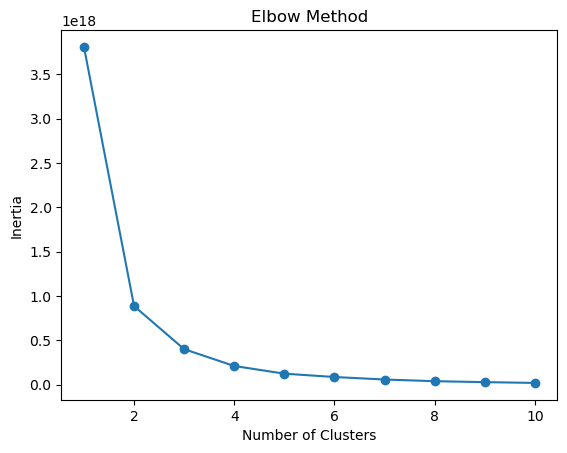

In [163]:
# Lower intertia is  better

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Visualize clusters using scatter plots:

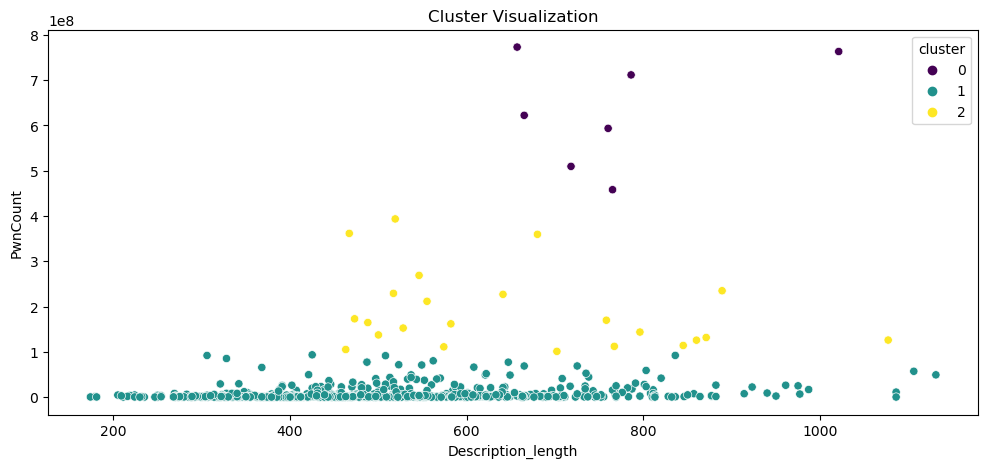

In [151]:
plt.figure(figsize=(12,5))
sns.scatterplot(y=df4['PwnCount'] ,x=df4['Description_length'] , data=df4 , palette='viridis', hue="cluster")
plt.title('Cluster Visualization')
plt.show()

In [152]:
df4.columns

Index(['Index', 'Name', 'Title', 'Domain', 'BreachDate', 'AddedDate',
       'ModifiedDate', 'PwnCount', 'Description', 'LogoPath', 'DataClasses',
       'IsVerified', 'IsFabricated', 'IsSensitive', 'IsRetired', 'IsSpamList',
       'IsMalware', 'IsSubscriptionFree', 'PwnCount_log', 'Description_length',
       'DelayDays', 'SensitiveMalware', 'cluster'],
      dtype='object')

In [180]:
# Clustering with domain feature

In [164]:
feat=df4[['PwnCount','Domain']]

In [173]:
mod=KMeans(n_clusters=2 , random_state=42)

In [174]:
modl=mod.fit_predict(feat)

C:\Users\wasid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [186]:
scor=silhouette_score(feat , modl)
scor

0.9598698546545068

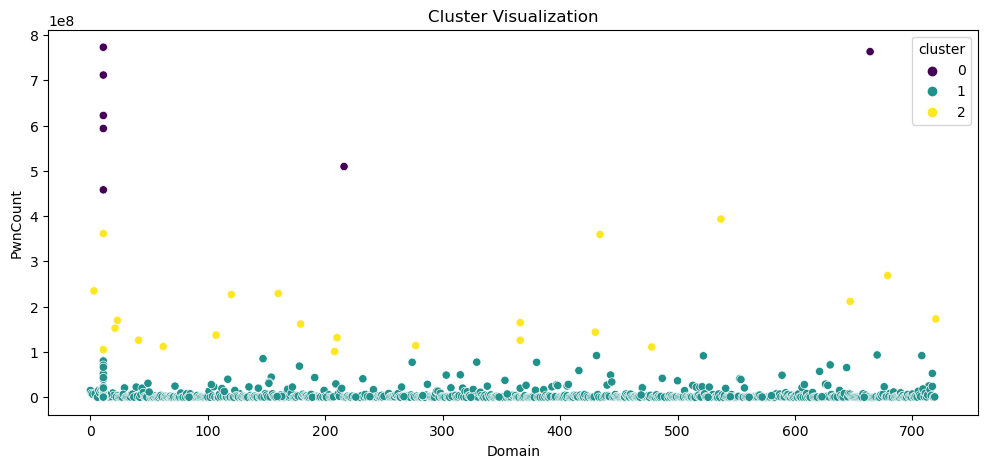

In [179]:
plt.figure(figsize=(12,5))
sns.scatterplot(y=df4['PwnCount'] ,x=df4['Domain'] , data=df4 , palette='viridis', hue="cluster")
plt.title('Cluster Visualization')
plt.show()

### Evaluation Score

In [187]:
# CLASSIFICATION MODEL SCORE= 92%
# CLUSTERIN MODEL SCORE = 92% , 95%